### K-means聚类

> 理论 《统计学习方法》第14章 聚类方法 14.3 k均值聚类
>
> 代码 numpy version && torch version
>
> Python3.7
>
> created 2023/02/14
>
> author lyz
>
> email 2281250383@qq.com

聚类是针对给定的样本，根据它们特征的相似度或者距离，将其归并到若干个"类"或"簇"。

聚类属于无监督学习

#### 相似度或距离

度量距离的方法有：
1. 闵可夫斯基距离
    p=2的时候是欧式距离
    $$d_{ij} = (\Sigma |x_{ki} - x_{kj}|^p)^{1\over p}$$


2. 相关系数
3. 余弦夹角


#### 类或簇

本质是样本的一个子集。用G表示类或者簇 cluster

簇的特征：
1. 类的均值$\bar {x}$又称类的中心
    $$
        \bar{x_G} = {1\over n_G} \Sigma^{n_G}_{i=1}x_i
    $$
2. 类的直径$D_G$
    类的直径是类中任意两个样本间的最大距离
3. 类的样本散步矩阵$A_G$与样本协方差矩阵

k-means是基于样本集合划分的聚类方法。k-means将样本集合划分为k个子集，构成k个类，将n个样本分到k个类中，每个样本到其所属类的中心的距离最小，每个样本只能属于一个类。

##### 模型

n个样本的集合X，每个样本由一个特征向量表示，特征向量的维数为m。

k-means的目的是将n个样本划分到k个不同的簇中，假设k个类$G_1,...G_k$。簇互不相交且其并集为X。

划分方法为C，C是一个多对一的函数。

k-means是一个从样本到类的函数

##### 策略

通过损失函数的最小换来选取最优的划分或函数$C^*$

采用欧式距离平方作为样本间的距离$d(x_i,x_j$

定义损失函数：样本与其所属类的中心间的距离总和

$$
    W(C) = \Sigma^k_{l=1} \Sigma_{C(i)=l} ||x_i-\bar{x_i}||^2
$$

k-means就是求解最优化问题

$$C^* = arg \min W(C) = arg \min \Sigma^k_{l=1} \Sigma_{C(i)=l} ||x_i-\bar{x_i}||^2 $$

##### 算法

迭代：

   1. 选择k个类的中心，将样本逐个指派到与其最近的中心的类中，得到一个聚类结果

   2. 更新每个类的样本均值，作为类的新的中心

重复迭代，直到收敛

In [41]:
%matplotlib inline

import torch
import numpy as np
from sklearn.datasets import make_blobs
import random
import matplotlib.pyplot as plt

In [42]:
k = 4

In [43]:
def draw_figure(dataset,labels,title):
    plt.figure(dpi=64,figsize=(4,4))
    plt.scatter(dataset[:,0],dataset[:,1],c=labels)
    plt.title(title)
    plt.show()

In [44]:
x_train,y_train = make_blobs(n_samples=200,n_features=2,centers=k,shuffle=True,random_state=11)
print(x_train.shape)

(200, 2)


##### 使用numpy实现的k-means

In [45]:
class KMeans(object):
    def __init__(self,k):
        self.k = k

    @staticmethod
    def calc_distance(a,b):
        c = a - b
        d = np.power(c,2)
        return np.sqrt(np.sum(d,axis=1))

    def get_labels(self,data):
        # 从data中随机选择k个样本作为初始的k个簇中心
        idx = random.sample(list(range(len(data))),self.k)
        clusters = data[idx]
        labels = np.zeros(len(data))
        while True:
            cnt = 0
            for i,d in enumerate(data):
                distances = self.calc_distance(d,clusters)
                # print('distances ',distances,'len ',len(distances))
                min_idx = np.argmin(distances)
                if labels[i] != min_idx:
                    cnt += 1
                    labels[i] = min_idx
                if cnt == 0:
                    # 若没有误分类的点，结束
                    break

            # 重新计算簇中心
            for label in range(self.k):
                points = data[labels == label]
                centroid = np.mean(points,axis=0)
                clusters[label] = centroid

            for cluster in clusters:
                print('cluster center is',cluster)

            return labels

In [46]:
net = KMeans(k)
labels = net.get_labels(x_train)

cluster center is [-0.84433296  4.64732241]
cluster center is [-9.72603893 -0.31254488]
cluster center is [-1.69544387 -0.25497474]
cluster center is [-6.28603255 -9.66570137]


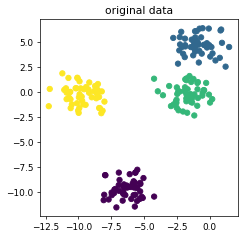

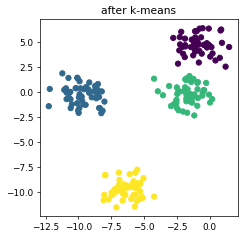

In [47]:
draw_figure(x_train,y_train,'original data')
draw_figure(x_train,labels,'after k-means')

##### PyTorchs实现K-means

In [48]:
pass